<h1> Projeto - Qualidade do vinho </h1>
    
<h4>link do dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/code    
    <h3> Resumo:<br><br>
         O dataset foi retirado kaggle e reúne variantes sobre o vinho tinto português e contam apenas com caracteristicas fisico-quimica.<br>
        O objetivo é analisa-las, descobrir informações de acordo com os dados diponíveis e conseguir classificar um vinho como bom ou ruim de acordo com suas características 
        <br>
        <br>
       
         - acidez fixa  - acidez volátil - ácido cítrico - açúcar residual - cloretos - dióxido de enxofre livre - dióxiodo de enxofre total
         - dendidade - pH - sulfatos - álcool




 

<h2> Algoritmo de machile learning que será usado: Classificação
<h2> Modelo: Regressão Linear
<h2> Objetivo: Acurácia acima de 70%

In [1]:
# import das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Leitura do arquivo .csv
arquivo = pd.read_csv('winequality-red.csv')

In [3]:
# Criando o dataframe
df = pd.DataFrame(arquivo)

<h2> Iniciando a análise exploratória. FASE 1
    
    <h4>     Irei observar: <br>
        - Tamanho do dataset <br>
        - Estatísticas gerais <br>
        - Se há dados faltantes, e a quantidade <br>
        - Se há dados duplicados e a quantidade <br>
        - Limpeza de dados NaN 

In [4]:
#Leitura das primeiras 5 linhas 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Número de linhas e colunas
print(f'Número de linhas: {len(df)}')
print(f'Número de colunas: {len(df.columns)}')

Número de linhas: 1599
Número de colunas: 12


In [6]:
#informações gerais 
df.info()
'''O conjunto de dados possui 11 variaveis do tipo float, e 1 do tipo inteiro'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


'O conjunto de dados possui 11 variaveis do tipo float, e 1 do tipo inteiro'

In [7]:
#Transposta das informações estatísticas. Facilita a visualização
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Visualizando as variáveis de modo estatístico já consigo tirar algumas informações gerais.:
#### Informações:



####   1-O média de teor alcoolico para o vinho tinho português é de **10,42%** <br>
####   2-O teor alcoolico dos vinhos testados variam de **8% à 14,9%**<br>
####   3-O pH médio é de **3,31**    --*E aqui obtenho a primeira informação relevante*--<br>
####   4-**Observação sobre o pH**: Muitos especialistas concordam que, um vinho com o pH mais baixo, ocasiona uma fermentação mais lenta, logo deixa o  vinho mais saboroso.<br>
####   5-Para o vinho tinto o preferível seria algo em torno de **3,3 a 3,6**. Temos a média de pH dentro do é recomendado.
####   6-Vinhos com o ph mais baixo também terão mais longevidade. O que deixa o vinho mais saboroso.<br>
####   7- Observamos também que as variáveis: Dióxido de Enxofre livre e Dióxido de Enxofre Total tem altos indíces de desvio padrão. 
####   8- O dióxido de enxofre serve como um conservante do vinho. Alguns produtores o adicionam como conservante, e outros usam conservantes mais naturais vindo do próprio processo de fermentação. Isso pode influenciar no sabor e a nota final do vinho<br>

In [8]:
#Dados ausentes
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#Dados Duplicados
prc = (240*100)/1599
print(f'Aproximadamente {prc:.1f}% do conjunto de dados é de dados duplicados')

Aproximadamente 15.0% do conjunto de dados é de dados duplicados


<h3> Como não há dados ausentes para serem tratados. Vamos tratar os dados duplicados usando a função do pandas .dropna

In [10]:
#Remoção dos dados duplicados
df.drop_duplicates(inplace=True)

In [11]:
#Verificando novamente
df.duplicated().sum()

0

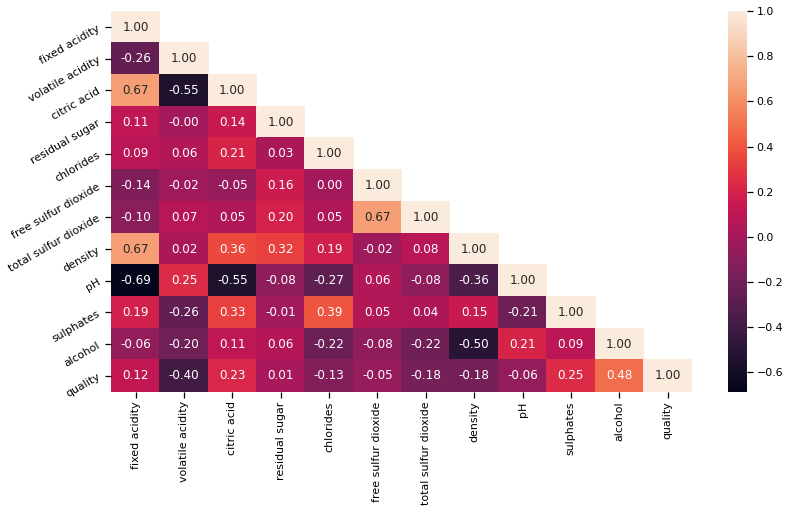

In [12]:
# gráfico de correlação
import numpy as np
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Com o gráfico percebemos que há correlação nas variáveis acidez fixa, acido cítrico e PH. 

#### **O nível de acidez vem do tipo de uva e do processo da fermentação, logo o pH depende do tipo de uva e da concetração de acidez que contém na casca da uva** 
#### As variáveis que contém o nível de acidez são diretamente correlacionadas com o nível de pH
#### Como não temos informações sobre o tipo da uva, decidi não interferir nas variáveis correlacionadas.

## Imagem da escala do pH 

<img src="ph_escala.jpg">

<h2> Análise Exploratória - Parte 2 
    Análise Gráfica

In [13]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<h3> Como está a distribuição de algumas variáveis??

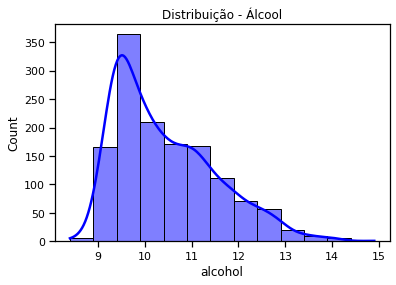

In [14]:
#Distribuição da variável de teor alcoolico
sns.histplot(data=df, x="alcohol", binwidth=0.5,kde=True, color='b')
plt.title('Distribuição - Álcool')
plt.show()

#### O teor alcoolico do vinho tem uma distribuição inclinada para a direita. Onde tem um pico entre **9,5% e 11%**, e logo
#### depois ele começa a cair. A média também se encontra entre esses valores, estando em **10,43%**

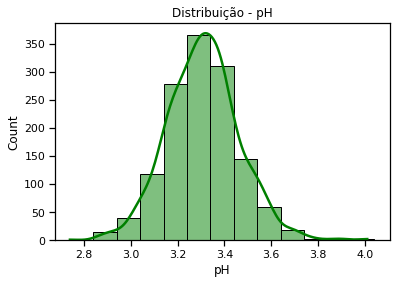

In [15]:
#Distribuição da variável de teor alcoolico
sns.histplot(data=df, x="pH", binwidth=0.1,kde=True, color='g')
plt.title('Distribuição - pH')
plt.show()


### No histograma da variável pH, notamos uma distribuição normal. O que confirma uma média, moda e mediana bem próximas umas das outras. Também podemos notar que a concentração é no centro da distribuição. Entre os valores **3,2 e 3,6**. Como já havia falado antes, para o vinho tinto o preferível seria algo em torno de 3,3 a 3,6 
## Disclaimer: <br>

#### 1-Como a grande maioria dos dados da variante pH está no centro, então a grande maioria está muito próximo ao que é considerado uma boa quantidade para o vinho.
#### 2- Existe ligação direta entre a concentração de pH e a qualidade do vinho.
#### 3-Olhando rapidamente é possível compreender que, _considerando uma distribuição normal_, se 68% dos dados estão no primeiro desvio padrão e 95% fica dentro de 2 desvios padrões da média. Temos +- uma porcentagem de 80% dos vinhos de boa qualidade fazendo a correlação de uma variável com a outra. 


# Análise de Outliers

### INFORMAÇÃO: Altas concentrações de acido volátil em vinhos não são desejáveis, pois podem denotar uma possível contaminação da bebida, já que esse parâmetro está relacionado à presença de ácido acético.
    
#### Dito isso, irei usar o gráfico de boxplot para saber se há outliers, e se a presença de dados discrepantes tem relação com a **qualidade do vinho**

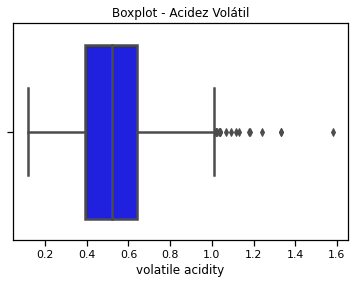

In [16]:
sns.boxplot(x='volatile acidity', data=df, color='b')
plt.title("Boxplot - Acidez Volátil")
plt.show()

#### Como foi observado, há muitos outliers na coluna Acidez Volátil. E além de influenciarem na média final,também podem influenciar na qualidade do vinho(que é a variável que irei prever)

#### Irei observar diretamente a variante **acidez volátil x qualidade** no boxplot

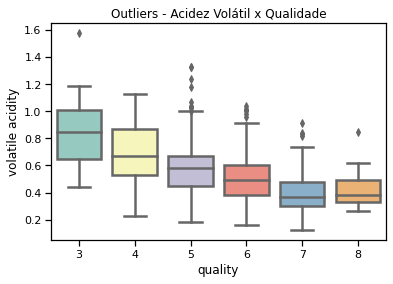

In [17]:
sns.boxplot(x="quality", y="volatile acidity", data=df, orient = 'v', palette='Set3')
plt.title("Outliers - Acidez Volátil x Qualidade")
plt.show()

#### O valor de acidez volátil que se aproxima de 1.6 foge demais da média que é de 0.52, foge também do que é considerado uma boa quantidade.O valor de 1.6 está na nota mais baixa da qualidade do vinho. 
#### Vamos fazer a remoção dos outliers da variante para que não influenciem no modelo preditivo

In [18]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['volatile acidity'], 75)
    q1 = np.percentile(df['volatile acidity'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['volatile acidity'] > iqr + np.percentile(df['volatile acidity'], 75)].index, inplace=True)
    df.drop(df[df['volatile acidity'] < np.percentile(df['volatile acidity'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['volatile acidity'])

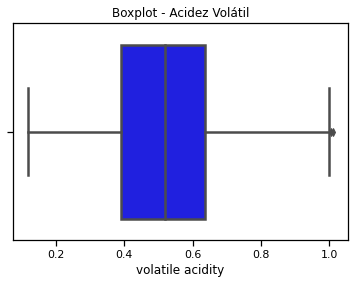

In [19]:
#Boxplot depois da remoção
sns.boxplot(x='volatile acidity', data=df, color='b')
plt.title("Boxplot - Acidez Volátil")
plt.show()

## Agora começa a análise de outliers para cada coluna do dataset 

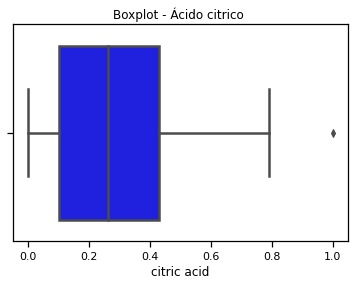

In [20]:
sns.boxplot(x='citric acid', data=df, color='b')
plt.title('Boxplot - Ácido citrico ')
plt.show()

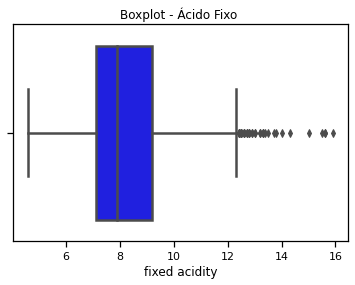

In [21]:
sns.boxplot(x= 'fixed acidity', data=df, color='b')
plt.title('Boxplot - Ácido Fixo ')
plt.show()

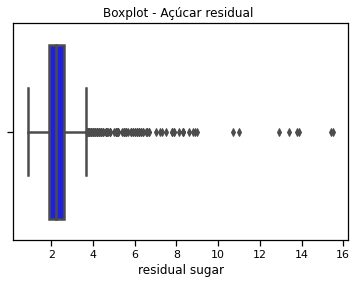

In [22]:
sns.boxplot(x='residual sugar', data=df, color='b')
plt.title('Boxplot - Açúcar residual ')
plt.show()

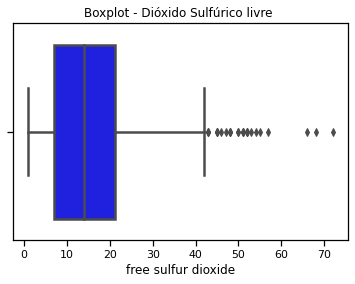

In [23]:
sns.boxplot(x = 'free sulfur dioxide', data=df, color='b')
plt.title('Boxplot - Dióxido Sulfúrico livre ')
plt.show()

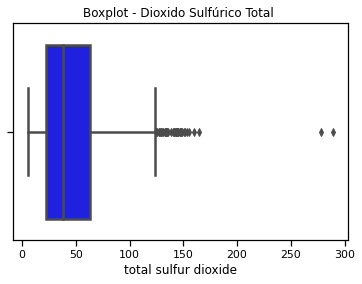

In [24]:
sns.boxplot(x= 'total sulfur dioxide', data=df, color='b')
plt.title('Boxplot - Dioxido Sulfúrico Total ')
plt.show()

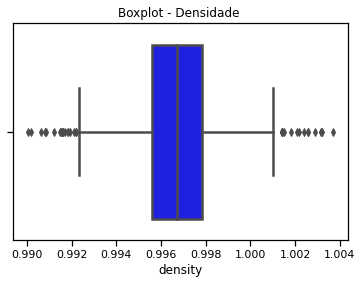

In [25]:
sns.boxplot(x= 'density', data=df, color='b')
plt.title('Boxplot - Densidade ')
plt.show()

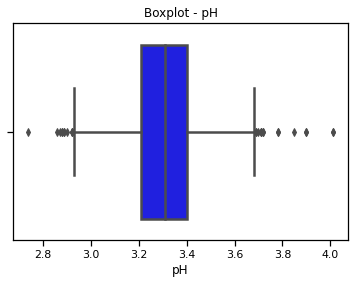

In [26]:
sns.boxplot(x= 'pH', data=df, color='b')
plt.title("Boxplot - pH")
plt.show()

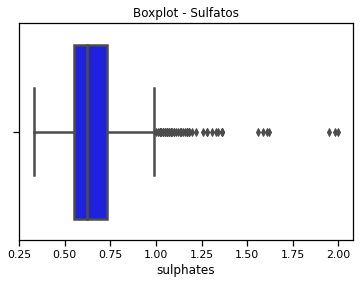

In [27]:
sns.boxplot( x= 'sulphates', data=df, color='b')
plt.title("Boxplot - Sulfatos")
plt.show()

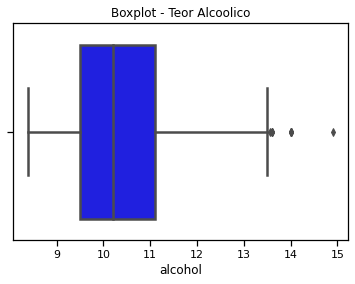

In [28]:
sns.boxplot(x= 'alcohol', data=df, color='b')
plt.title("Boxplot - Teor Alcoolico")
plt.show()

#### A variável açúcar residual me chamou atenção por aprensentar bastantes outliers. Apesar do desvio padrão não se distanciar muito do centro, e da grande maiores dos dados estarem dentro de 2 quatis da média, existe uma parte desses dados que foge muito das medidas de tendência central.<br>
#### Por esse motivo irei plotar mais uma vez o bloxplot - Açúcar residual

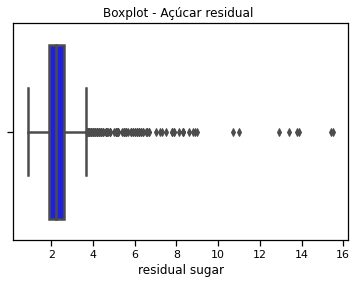

In [29]:
sns.boxplot(x='residual sugar', data=df, color='b')
plt.title('Boxplot - Açúcar residual ')
plt.show()

<h3> Agora o Boxplot que relaciona Açúcar Residual x Qualidade

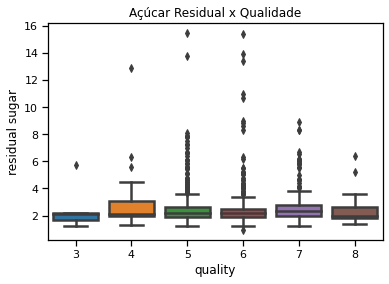

In [30]:
sns.boxplot(x="quality", y="residual sugar", data=df)
plt.title('Açúcar Residual x Qualidade')
plt.show()

#### Ao contrário do que aconteceu com a acidez volátil, a discrepância do  açucar residual é fortemente relacinada com a notas medianas de vinho.

#### Mas será que a quantidade de açúcar acompanha a quantidade de álcool presente no vinho graças a fermentação?
    
### Como característica do vinho tinto português, é muito marcado por uma concentração maior de açúcar, que pode até se aproximar de um licor. O que propus aqui, é saber se quanto maior a quantidade de açúcar, seria maior a concentração alcoolica. já que no processo de fermentação, o açúcar tende a virar álcool.

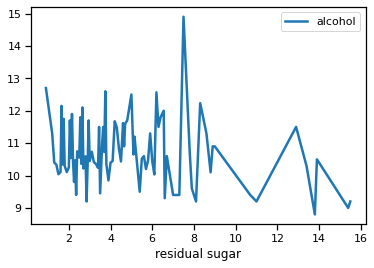

In [31]:
df.groupby(['residual sugar']).agg({'alcohol' : 'mean'}).plot()
plt.show()

In [32]:
# Tamanho do dataset depois da retirada dos dados nulos e antes da retitrada dos outliers
df.shape

(1340, 12)

<h3> Com os outliers identificados, vamos remove-los usando o seguinte método. Variações abaixo do 1º quartil e acima do 3º quartil serão retiradas com a função a seguir

In [33]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['volatile acidity'], 75)
    q1 = np.percentile(df['volatile acidity'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['volatile acidity'] > iqr + np.percentile(df['volatile acidity'], 75)].index, inplace=True)
    df.drop(df[df['volatile acidity'] < np.percentile(df['volatile acidity'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['volatile acidity'])

In [34]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['residual sugar'], 75)
    q1 = np.percentile(df['residual sugar'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['residual sugar'] > iqr + np.percentile(df['residual sugar'], 75)].index, inplace=True)
    df.drop(df[df['residual sugar'] < np.percentile(df['residual sugar'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['residual sugar'])

In [35]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['fixed acidity'], 75)
    q1 = np.percentile(df['fixed acidity'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['fixed acidity'] > iqr + np.percentile(df['fixed acidity'], 75)].index, inplace=True)
    df.drop(df[df['fixed acidity'] < np.percentile(df['fixed acidity'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['fixed acidity'])

In [36]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['free sulfur dioxide'], 75)
    q1 = np.percentile(df['free sulfur dioxide'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['free sulfur dioxide'] > iqr + np.percentile(df['free sulfur dioxide'], 75)].index, inplace=True)
    df.drop(df[df['free sulfur dioxide'] < np.percentile(df['free sulfur dioxide'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['free sulfur dioxide'])

In [37]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['total sulfur dioxide'], 75)
    q1 = np.percentile(df['total sulfur dioxide'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['total sulfur dioxide'] > iqr + np.percentile(df['total sulfur dioxide'], 75)].index, inplace=True)
    df.drop(df[df['total sulfur dioxide'] < np.percentile(df['total sulfur dioxide'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['total sulfur dioxide'])

In [38]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['density'], 75)
    q1 = np.percentile(df['density'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['density'] > iqr + np.percentile(df['density'], 75)].index, inplace=True)
    df.drop(df[df['density'] < np.percentile(df['density'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['density'])

In [39]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['pH'], 75)
    q1 = np.percentile(df['pH'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['pH'] > iqr + np.percentile(df['pH'], 75)].index, inplace=True)
    df.drop(df[df['pH'] < np.percentile(df['pH'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['pH'])

In [40]:
def remove_outliers(df, coluna=df.columns):
    q3 = np.percentile(df['sulphates'], 75)
    q1 = np.percentile(df['sulphates'], 25)
    fator = 1.5
    iqr = fator * (q3 - q1) #diferença interquartil   
   
    df.drop(df[df['sulphates'] > iqr + np.percentile(df['sulphates'], 75)].index, inplace=True)
    df.drop(df[df['sulphates'] < np.percentile(df['sulphates'], 25) - iqr].index, inplace=True) 
remove_outliers(df, df['sulphates'])

<h3>Remoção dos outliers de todas as colunas. Vamos ver qual é o novo tamanho da tabela

In [41]:
df.shape

(1035, 12)

<h2> Shape do Dataset
<h3>Tamanho Inicial = 1599<br>
Tamanho sem os dados nulos/duplicados = 1359<br>
Tamanho sem Outliers = 1035


<AxesSubplot:xlabel='quality', ylabel='count'>

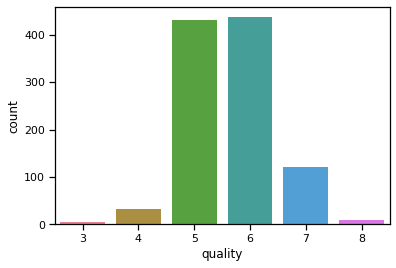

In [42]:
#contagem de forma gáfica das variáveis em quantidade
sns.countplot(data= df, x= 'quality', palette='husl')

### A coluna QUALIDADE está mal distribuiada, o que é bem ruim na hora do treinamento do modelo 
**É PRECISO DISTRIBUIR AS CATEGORIAS ANTES DO TREINAMENTO**

In [43]:
qualidade_map ={3 : 0, 
               4 : 0, 
               5 : 0,
               6 : 1,
               7 : 1,
               8 : 1}

df['quality'] = df['quality'].map(qualidade_map)

In [44]:
df.quality.head(10)

0     0
1     0
2     0
3     1
5     0
6     0
7     1
8     1
10    0
12    0
Name: quality, dtype: int64

#### Depois de fazer o mapeamento da variável Qualidade. Atribui 0 para as notas 3, 4 e 5. E 1 para as notas 6, 7 e 8.
### Classificando 0 para ruim e 1 para bom

In [45]:
list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<h2> Treinamento do modelo

In [46]:
#definindo as variáveis preditoras
X = pd.DataFrame(columns = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol'], data = df)

In [47]:
#Definição da variável target
y = pd.DataFrame(columns = ['quality'], data= df)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#Definição do dataset de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [50]:
#Normalizando os dados
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [60]:
#Importanto, configurando e Treinando o Modelo de Regressão
from sklearn.linear_model import LogisticRegression


In [61]:
#Configurando o modelo
modelo = LogisticRegression(verbose=1, max_iter=1000) 


In [62]:
#Treinando o Modelo
modelo.fit(X_train, np.ravel(y_train, order='C'))
y_pred = modelo.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [63]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [64]:
# Contagem da variável qualidade
df['quality'].value_counts()

1    566
0    469
Name: quality, dtype: int64

In [65]:
#importando a função para mostrar a matriz confusão
from sklearn import metrics


In [68]:
#Instanciando a matriz confusão
cnf_matrix =  metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[108,  30],
       [ 38, 135]])

In [69]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       138
           1       0.82      0.78      0.80       173

    accuracy                           0.78       311
   macro avg       0.78      0.78      0.78       311
weighted avg       0.78      0.78      0.78       311



In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, modelo.predict(X_test))
print(f"Acurácia dos dados de treino: {accuracy_score(y_train, modelo.predict(X_train))}")
print(f"Accuracy Score of Training Data is {lr_acc}\n")

Acurácia dos dados de treino: 0.712707182320442
Accuracy Score of Training Data is 0.7813504823151125



In [71]:
#importante o pacote para salvar o modelo
import pickle

In [72]:
#definindo em qual caminho vamos salvar o modelo
modelo_treinado = 'modelo_final.sav'

In [75]:
#salvando o modelo
pickle.dump(modelo,open(modelo_treinado, 'wb'))

In [76]:
#carregando o modelo treinado
modelo_carregado = pickle.load(open(modelo_treinado, 'rb'))

In [83]:
#fazendo predição do novo dado com o modelo carregado
modelo_carregado.predict([X_test[0]])

array([1])